In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from jax.config import config
config.update('jax_enable_x64', True)

import numpy as np

from jax import random
import jax.numpy as jnp

import numpyro
numpyro.set_host_device_count(10)

import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive

import celerite2.jax
from celerite2.jax import terms

import scipy.signal as sig

from gwpy.timeseries import TimeSeries

import h5py

import matplotlib.pyplot as plt

import arviz as az

from tqdm.notebook import tqdm

from line_cleaner import clean_strain

/var/folders/kh/yn7djbsx35vb_gqd5m31brm00000gq/T/ipykernel_20953/1520297450.py:1: DeprecationWarning: Accessing jax.config via the jax.config submodule is deprecated.
  from jax.config import config


In [3]:
with h5py.File('H-H1_HOFT_C00-1384779776.h5', 'r') as f:
    data = jnp.array(f['H1:GDS-CALIB_STRAIN_CLEAN'])
t0 = 1384782889
T = 256
srate = 16384
istart = (t0 - 1384779776)*srate
iend = istart + T*srate

data = data[istart:iend]
times = jnp.arange(len(data))/srate

In [4]:
f, p = sig.welch(data, fs=srate, nperseg=16*srate, average='median')

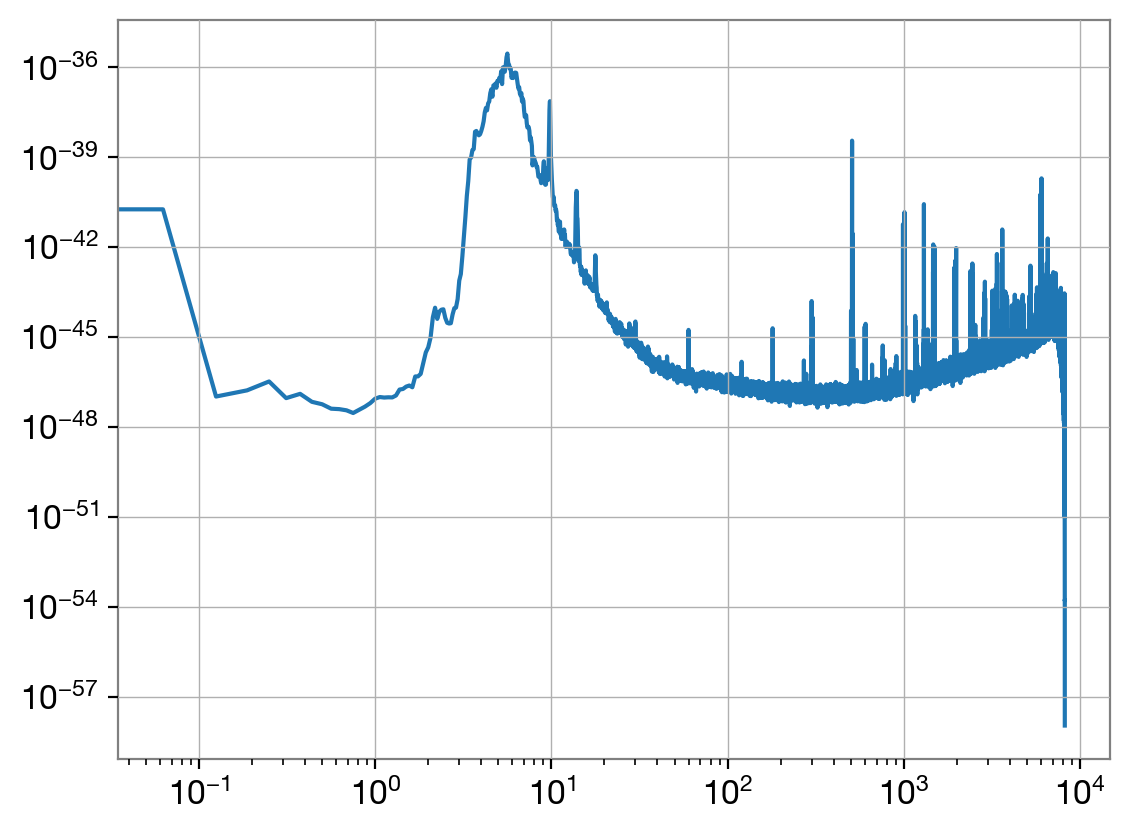

In [5]:
plt.loglog(f,p)

In [6]:
f0s = [60.0, 120.0, 180.0]
bws = [2.0, 4.0, 4.0]

In [7]:
cleaned_times, cleaned_strain = clean_strain(times, data, srate, f0s, bws, 16.0)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [15]:
fc, pc = sig.welch(cleaned_strain, fs=srate, nperseg=16*srate, average='median')

Text(0, 0.5, '$P(f) / \\mathrm{strain}^2 \\mathrm{Hz}^{-1}$')

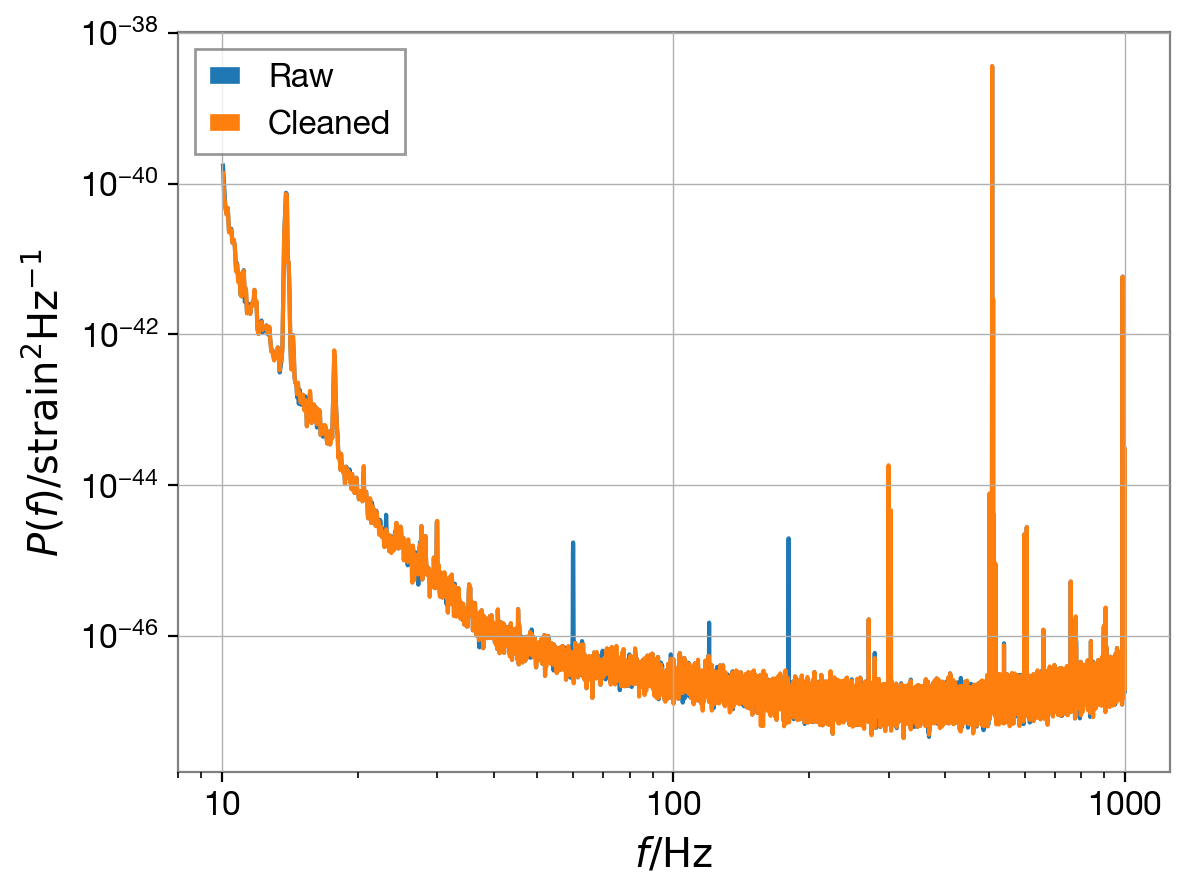

In [16]:
sel = (f > 10) & (f < 1000)
plt.loglog(f[sel], p[sel], label="Raw")
plt.loglog(fc[sel], pc[sel], label="Cleaned")
plt.legend()
plt.xlabel(r'$f / \mathrm{Hz}$')
plt.ylabel(r'$P(f) / \mathrm{strain}^2 \mathrm{Hz}^{-1}$')